In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv(os.path.join("data/KidneyData.csv"))
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna(how='any')

In [4]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,274.841772,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342
std,102.998517,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204
min,3.000000,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000
25%,243.000000,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000
50%,298.500000,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000
75%,355.750000,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000
max,399.000000,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000


In [5]:
df.drop(df[df.pot > 40].index, inplace=True)
df.drop(df[df.bgr > 400].index, inplace=True)
df.drop(df[df.bu > 300].index, inplace=True)

# Preprocessing of Data

In [54]:
data = df["cad"].copy()

# data_binary_encoded = pd.get_dummies(data)
# data_binary_encoded.head()
data.value_counts()

no     144
yes     10
Name: cad, dtype: int64

In [55]:
target = data
target_names = ["negative", "positive"]

In [8]:
kidney_data = df.drop(columns=["cad", "id"], axis=1)

In [9]:
data1 = kidney_data.copy()

data_binary_encoded1 = pd.get_dummies(data1, columns=["rbc", "pc", "pcc", "ba", "htn", "dm", "appet", "pe", "ane", "classification"])
data_binary_encoded1.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,dm_no,dm_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification_ckd,classification_notckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,0,1,0,1,0,1,1,0
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,0,1,0,1,1,0,0,1,1,0
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,0,1,0,1,0,1,1,0,1,0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0,1,0,1,0,1,1,0,1,0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,0,1,0,1,0,1,0,1,1,0


In [10]:
data_binary_encoded1.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_abnormal', 'rbc_normal', 'pc_abnormal',
       'pc_normal', 'pcc_notpresent', 'pcc_present', 'ba_notpresent',
       'ba_present', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes', 'appet_good',
       'appet_poor', 'pe_no', 'pe_yes', 'ane_no', 'ane_yes',
       'classification_ckd', 'classification_notckd'],
      dtype='object')

In [11]:
kidney_binary_data = data_binary_encoded1.drop(columns=['rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes', 'dm_yes','appet_poor', 'pe_yes', 'ane_yes', 'classification_notckd'])
kidney_binary_data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_abnormal', 'pc_abnormal', 'pcc_notpresent',
       'ba_notpresent', 'htn_no', 'dm_no', 'appet_good', 'pe_no', 'ane_no',
       'classification_ckd'],
      dtype='object')

In [12]:
feature_names = kidney_binary_data.columns

In [13]:
kidney_binary_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_abnormal,pc_abnormal,pcc_notpresent,ba_notpresent,htn_no,dm_no,appet_good,pe_no,ane_no,classification_ckd
count,154.000000,154.000000,154.000000,154.00000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,49.376623,73.766234,1.020097,0.74026,0.181818,126.220779,49.883117,2.094156,139.038961,4.355844,...,0.103896,0.168831,0.915584,0.928571,0.805195,0.844156,0.883117,0.876623,0.909091,0.253247
std,15.661483,11.089530,0.005377,1.37106,0.651339,53.210305,42.096364,2.970536,7.446439,0.751294,...,0.306121,0.375825,0.278917,0.258380,0.397343,0.363891,0.322329,0.329942,0.288418,0.436290
min,6.000000,50.000000,1.005000,0.00000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,60.000000,1.020000,0.00000,0.000000,96.250000,25.250000,0.700000,135.000000,3.700000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,50.000000,75.000000,1.020000,0.00000,0.000000,113.000000,39.000000,1.050000,140.000000,4.500000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,60.000000,80.000000,1.025000,0.00000,0.000000,131.000000,49.000000,1.200000,144.000000,4.900000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000
max,83.000000,110.000000,1.025000,4.00000,4.000000,380.000000,235.000000,15.200000,150.000000,7.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
kidney_binary_data.sort_values("pot", ascending=False)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_abnormal,pc_abnormal,pcc_notpresent,ba_notpresent,htn_no,dm_no,appet_good,pe_no,ane_no,classification_ckd
84,59.0,70.0,1.010,3.0,0.0,76.0,186.0,15.0,135.0,7.6,...,0,1,1,1,0,1,0,0,0,1
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0,1,0,0,0,0,0,0,1,1
58,73.0,80.0,1.020,2.0,0.0,253.0,142.0,4.6,138.0,5.8,...,1,1,1,1,0,0,1,1,1,1
210,59.0,100.0,1.015,4.0,2.0,255.0,132.0,12.8,135.0,5.7,...,0,0,1,1,0,0,1,1,0,1
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,15.2,120.0,5.7,...,1,0,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,49.0,100.0,1.010,3.0,0.0,129.0,158.0,11.8,122.0,3.2,...,1,1,1,1,0,0,0,0,0,1
147,60.0,60.0,1.010,3.0,1.0,288.0,36.0,1.7,130.0,3.0,...,0,1,0,1,0,1,0,1,0,1
229,59.0,50.0,1.010,3.0,0.0,241.0,191.0,12.0,114.0,2.9,...,0,1,1,1,1,0,1,0,1,1
93,73.0,100.0,1.010,3.0,2.0,295.0,90.0,5.6,140.0,2.9,...,1,1,0,1,0,0,0,1,1,1


In [15]:
kidney_binary_data.drop(kidney_binary_data[kidney_binary_data.pot > 40].index, inplace=True)

In [16]:
kidney_binary_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_abnormal,pc_abnormal,pcc_notpresent,ba_notpresent,htn_no,dm_no,appet_good,pe_no,ane_no,classification_ckd
count,154.000000,154.000000,154.000000,154.00000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,49.376623,73.766234,1.020097,0.74026,0.181818,126.220779,49.883117,2.094156,139.038961,4.355844,...,0.103896,0.168831,0.915584,0.928571,0.805195,0.844156,0.883117,0.876623,0.909091,0.253247
std,15.661483,11.089530,0.005377,1.37106,0.651339,53.210305,42.096364,2.970536,7.446439,0.751294,...,0.306121,0.375825,0.278917,0.258380,0.397343,0.363891,0.322329,0.329942,0.288418,0.436290
min,6.000000,50.000000,1.005000,0.00000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,60.000000,1.020000,0.00000,0.000000,96.250000,25.250000,0.700000,135.000000,3.700000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,50.000000,75.000000,1.020000,0.00000,0.000000,113.000000,39.000000,1.050000,140.000000,4.500000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,60.000000,80.000000,1.025000,0.00000,0.000000,131.000000,49.000000,1.200000,144.000000,4.900000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000
max,83.000000,110.000000,1.025000,4.00000,4.000000,380.000000,235.000000,15.200000,150.000000,7.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(kidney_binary_data, target, random_state=630, stratify=target)

In [59]:
y_train.value_counts()

no     108
yes      7
Name: cad, dtype: int64

# Decision Tree:

In [60]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
DTA = round(clf.score(X_test, y_test)*100, 2)
DTA

94.87

Decision Tree Confusion matrix, without normalization
[[36  0]
 [ 2  1]]
Decision Tree Normalized confusion matrix
[[1.   0.  ]
 [0.67 0.33]]


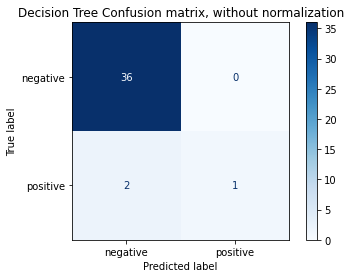

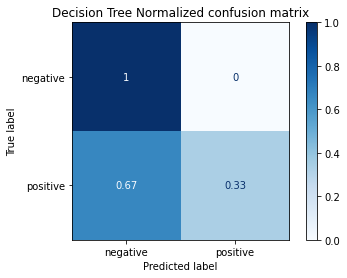

In [63]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Decision Tree Confusion matrix, without normalization", None),
                  ("Decision Tree Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Random Forest:

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
RFA = round(rf.score(X_test, y_test)*100, 2)
RFA

94.87

In [65]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.12533999806704915, 'bgr'),
 (0.10307171962474644, 'bu'),
 (0.09026610368544845, 'pot'),
 (0.07340220353829748, 'su'),
 (0.07291857815782804, 'hemo'),
 (0.07212431907560973, 'sc'),
 (0.06907945502761371, 'rc'),
 (0.0640349050341415, 'bp'),
 (0.05235776611783491, 'age'),
 (0.045584069514288623, 'pcv'),
 (0.03714769156376439, 'sod'),
 (0.03221793047488183, 'al'),
 (0.02279908695113675, 'sg'),
 (0.021028111215941628, 'wc'),
 (0.01820422838049462, 'rbc_abnormal'),
 (0.01517003307197716, 'htn_no'),
 (0.014543376675525712, 'appet_good'),
 (0.0139499936460905, 'dm_no'),
 (0.01279000880725378, 'pc_abnormal'),
 (0.011555468739176695, 'pcc_notpresent'),
 (0.01133003874210622, 'pe_no'),
 (0.008583348468476394, 'ane_no'),
 (0.006372152522334522, 'ba_notpresent'),
 (0.006129412897981826, 'classification_ckd')]

Random Forrest Confusion matrix, without normalization
[[36  0]
 [ 2  1]]
Random Forrest Normalized confusion matrix
[[1.   0.  ]
 [0.67 0.33]]


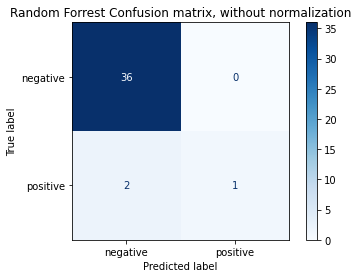

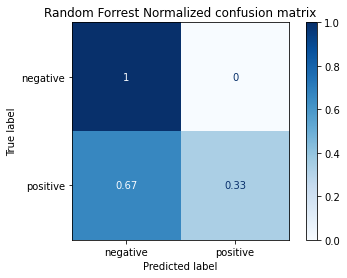

In [66]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Random Forrest Confusion matrix, without normalization", None),
                  ("Random Forrest Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [68]:
classifier.fit(X_train, y_train)

C:\Users\Travis Young\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [69]:
LRA = round((classifier.score(X_test, y_test) * 100),2)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
LRA

Training Data Score: 0.9565217391304348
Testing Data Score: 0.9230769230769231


92.31

In [70]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes']
First 10 Actual labels: ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [71]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
5,no,no
6,no,no
7,no,no
8,yes,no
9,yes,no


Logistic Regression Confusion matrix, without normalization
[[34  2]
 [ 1  2]]
Logistic Regression Normalized confusion matrix
[[0.94 0.06]
 [0.33 0.67]]


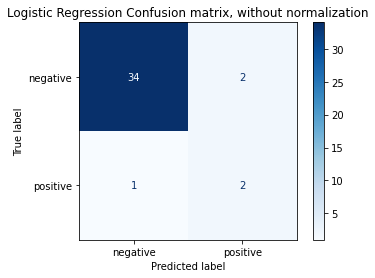

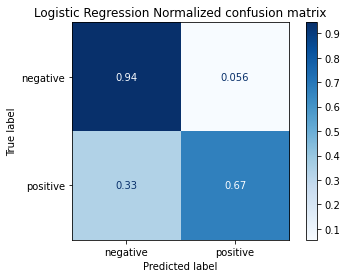

In [72]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Logistic Regression Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# SVC

In [73]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)
svc = model.fit(X_train, y_train)

In [74]:
print('Test Acc: %.3f' % model.score(X_test, y_test))
SVMA = round((svc.score(X_test, y_test) * 100),2)
SVMA

Test Acc: 0.872


87.18

In [75]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.92      0.94      0.93        36
    positive       0.00      0.00      0.00         3

    accuracy                           0.87        39
   macro avg       0.46      0.47      0.47        39
weighted avg       0.85      0.87      0.86        39



Support Vector Machine Confusion matrix, without normalization
[[34  2]
 [ 3  0]]
Support Vector Machine Normalized confusion matrix
[[0.94 0.06]
 [1.   0.  ]]


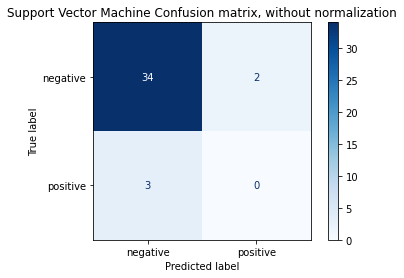

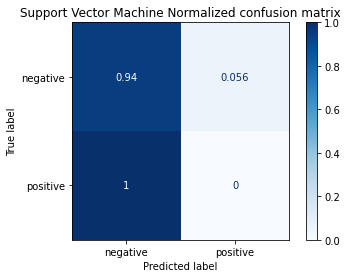

In [76]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Support Vector Machine Confusion matrix, without normalization", None),
                  ("Support Vector Machine Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# One-Hot Encoding

In [79]:
data = df["cad"].copy()

y_train_binary_encoded = pd.get_dummies(y_train)
y_test_binary_encoded = pd.get_dummies(y_test)
y_train_binary_encoded.head()

,no,yes
353,1,0
390,1,0
71,1,0
189,1,0
262,1,0


In [80]:
y_train_binary = y_train_binary_encoded.drop(columns="yes")
y_test_binary = y_test_binary_encoded.drop(columns="yes")

In [81]:
y_train_binary

,no
353,1
390,1
71,1
189,1
262,1
...,...
279,1
286,1
389,1
226,1


In [82]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train_binary)
y_test_categorical = to_categorical(y_test_binary)
y_train_categorical

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

# Scaling the Data:

In [83]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [84]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbor

In [85]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.923
k: 3, Train/Test Score: 0.939/0.897
k: 5, Train/Test Score: 0.939/0.923
k: 7, Train/Test Score: 0.930/0.897
k: 9, Train/Test Score: 0.930/0.923
k: 11, Train/Test Score: 0.939/0.923
k: 13, Train/Test Score: 0.939/0.923
k: 15, Train/Test Score: 0.939/0.923
k: 17, Train/Test Score: 0.939/0.923
k: 19, Train/Test Score: 0.939/0.923
k: 21, Train/Test Score: 0.939/0.923
k: 23, Train/Test Score: 0.939/0.923
k: 25, Train/Test Score: 0.939/0.923
k: 27, Train/Test Score: 0.939/0.923
k: 29, Train/Test Score: 0.939/0.923


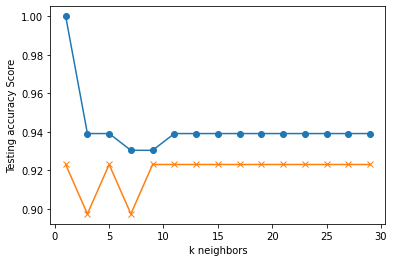

In [86]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [91]:
knn = KNeighborsClassifier(n_neighbors=1)
KNEAR = knn.fit(X_train_scaled, y_train)
print('k=1 Test Acc: %.3f' % KNEAR.score(X_test_scaled, y_test))
KNNA = round((knn.score(X_test_scaled, y_test) * 100),2)
KNNA

k=1 Test Acc: 0.923


92.31

K Nearest Neighbor Confusion matrix, without normalization
[[36  0]
 [ 3  0]]
K Nearest Neighbor Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


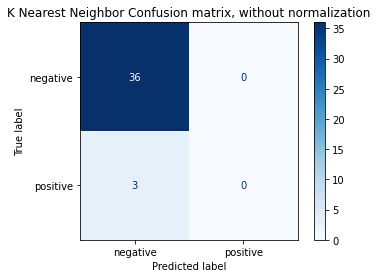

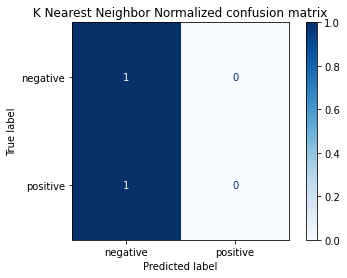

In [92]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("K Nearest Neighbor Confusion matrix, without normalization", None),
                  ("K Nearest Neighbor Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test_scaled, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Neural Network

In [39]:
# from tensorflow.keras.utils import to_categorical

In [40]:
# y_train_categorical = to_categorical(y_train)
# y_test_categorical = to_categorical(y_test)

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=48, activation='relu', input_dim=24))
model.add(Dense(units=2, activation='softmax'))

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 48)                1200      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 98        
Total params: 1,298
Trainable params: 1,298
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [152]:
NNA_model = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 115 samples
Epoch 1/100
115/115 - 0s - loss: 0.0097 - accuracy: 1.0000
Epoch 2/100
115/115 - 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 3/100
115/115 - 0s - loss: 0.0093 - accuracy: 1.0000
Epoch 4/100
115/115 - 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 5/100
115/115 - 0s - loss: 0.0089 - accuracy: 1.0000
Epoch 6/100
115/115 - 0s - loss: 0.0087 - accuracy: 1.0000
Epoch 7/100
115/115 - 0s - loss: 0.0086 - accuracy: 1.0000
Epoch 8/100
115/115 - 0s - loss: 0.0084 - accuracy: 1.0000
Epoch 9/100
115/115 - 0s - loss: 0.0082 - accuracy: 1.0000
Epoch 10/100
115/115 - 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 11/100
115/115 - 0s - loss: 0.0079 - accuracy: 1.0000
Epoch 12/100
115/115 - 0s - loss: 0.0078 - accuracy: 1.0000
Epoch 13/100
115/115 - 0s - loss: 0.0076 - accuracy: 1.0000
Epoch 14/100
115/115 - 0s - loss: 0.0075 - accuracy: 1.0000
Epoch 15/100
115/115 - 0s - loss: 0.0074 - accuracy: 1.0000
Epoch 16/100
115/115 - 0s - loss: 0.0072 - accuracy: 1.0000
Epoch 17/100
115/115 - 0s - 

In [97]:
# # evaluate the model
# _, train_acc = model.evaluate(trainX, trainy, verbose=0)
# _, test_acc = model.evaluate(testX, testy, verbose=0)
# Neural Network Acct
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

NNA = round((model_accuracy * 100),2)
NNA

39/39 - 0s - loss: 0.1662 - accuracy: 0.9231
Normal Neural Network - Loss: 0.166234410690287, Accuracy: 0.9230769276618958


92.31

In [134]:
NNA_predictions = model.predict_classes(X_test_scaled)

In [ ]:
predict

In [100]:
import tensorflow as tf

In [103]:
TP = tf.math.count_nonzero(NNA_predictions*y_test_categorical)

In [104]:
print(TP)

tf.Tensor(39, shape=(), dtype=int64)


In [109]:
FP = tf.math.count_nonzero(NNA_predictions*(y_test_categorical-1))

In [107]:
print(TP/(TP+FP))

tf.Tensor(0.5, shape=(), dtype=float64)


In [110]:
print(FP)

tf.Tensor(39, shape=(), dtype=int64)


In [165]:
# NNA_predictions_df = pd.DataFrame({"True_Pos": TP, "False_Pos": FP})
# # pd.DataFrame({"Prediction": predictions, "Actual": y_test})
# NNA_predictions.head()

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [148]:
NNA_series = pd.Series(NNA_predictions)

In [147]:
y_test_binary

,no
364,1
339,1
313,1
398,1
306,1
275,1
384,1
9,1
153,1
171,1


In [150]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(NNA_series, y_test_binary)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(NNA_series, y_test_binary)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(NNA_series, y_test_binary)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(NNA_series, y_test_binary)
print('F1 score: %f' % f1)

Accuracy: 0.923077
Precision: 0.972222
Recall: 0.945946
F1 score: 0.958904


### Confusion Matrix for Neural Network

In [151]:
# confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(NNA_series, y_test_binary)
print(matrix)

[[ 1  1]
 [ 2 35]]


In [160]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(NNA_series, y_test_binary)
print(matrix)

[[ 1  1]
 [ 2 35]]


In [168]:
X_test_scaled

array([[ 1.61e+00,  5.47e-01,  8.77e-01, -5.22e-01, -2.62e-01, -1.34e-01,
        -9.17e-02, -4.40e-01, -3.44e-01, -1.05e+00,  3.61e-01,  3.16e-01,
         3.14e-01, -2.72e-01, -3.41e-01, -4.31e-01,  2.55e-01,  2.13e-01,
         4.86e-01,  4.02e-01,  3.41e-01,  3.41e-01,  2.91e-01, -5.67e-01],
       [-1.48e+00, -3.15e-01, -6.56e-02, -5.22e-01, -2.62e-01, -6.67e-01,
        -1.43e-01, -5.08e-01, -4.82e-01, -1.05e+00, -2.01e-01,  6.78e-01,
        -4.11e-01, -6.82e-02, -3.41e-01, -4.31e-01,  2.55e-01,  2.13e-01,
         4.86e-01,  4.02e-01,  3.41e-01,  3.41e-01,  2.91e-01, -5.67e-01],
       [ 4.52e-01,  5.47e-01, -6.56e-02, -5.22e-01, -2.62e-01, -3.82e-01,
        -4.98e-01, -3.73e-01,  3.47e-01,  6.66e-01,  1.30e+00,  1.16e+00,
        -3.26e-02, -1.70e-01, -3.41e-01, -4.31e-01,  2.55e-01,  2.13e-01,
         4.86e-01,  4.02e-01,  3.41e-01,  3.41e-01,  2.91e-01, -5.67e-01],
       [-2.00e+00, -1.18e+00,  8.77e-01, -5.22e-01, -2.62e-01, -2.05e-01,
         6.08e-02, -3.39e-01, -6.20

In [169]:
y_test_categorical

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [166]:
# from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(NNA_model, X_test_scaled, y_test_categorical)


ValueError: plot_confusion_matrix only supports classifiers

In [157]:
NNA_model.NNA_model["loss"]

AttributeError: 'History' object has no attribute 'NNA_model'

In [153]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(NNA_model, NNA_series, y_test_binary)

ValueError: plot_confusion_matrix only supports classifiers

In [98]:
# m = tf.keras.metrics.AUC(num_thresholds=3)
# m.update_state([0, 0, 1, 1], [0, 0.5, 0.3, 0.9])
# m.result().np()

NameError: name 'tf' is not defined

# Deep Learning

In [ ]:
deep_model = Sequential()
deep_model.add(Dense(units=48, activation='relu', input_dim=24))
deep_model.add(Dense(units=24, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [ ]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
import numpy as np

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Logistic Regression Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# Deep Learning Acct
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")


DLA = round((model_accuracy * 100),2)
DLA

# Model Accuracy

In [ ]:
# CLF = clf.score(X_test, y_test) * 100

# LRA = classifier.score(X_test, y_test) * 100
# DTA = (clf.score(X_test, y_test) * 100)
# RFA = (rf.score(X_test, y_test) * 100)
# SVMA = (svc.score(X_test, y_test) * 100)
# KNNA = (knn.score(X_test_scaled, y_test) * 100)
# NNA = (model_accuracy * 100).round(2)

In [ ]:
# print(f"LRA: {LRA}")
# print(f"DTA: {DTA}")
# print(f"RFA: {RFA}")
# print(f"SVMA: {SVMA}")
# print(f"KNNA: {KNNA}")
# print(f"NNA: {NNA}")

In [ ]:
KidneyModelAccuracy_df = pd.DataFrame({"ML_Model":["Decision Tree","Random Forrest","Logistical Regression","Support Vector Machine","K Nearest Neighbors","Neural Network","Deep Learning"],
                            "Kidney_Model_Accuracy":[DTA, RFA, LRA, SVMA, KNNA, NNA, DLA]                       
                             })

KidneyModelAccuracy_df

In [ ]:
Accuracy_df = pd.read_csv(os.path.join("data/Heart_Model_Accuracy.csv"))
Accuracy_df

In [ ]:
Model_Accuracy_df = pd.merge(Accuracy_df, KidneyModelAccuracy_df, on='ML_Model')
Model_Accuracy_df = Model_Accuracy_df.rename(columns={'Accuracy':'Heart_Model_Accuracy'})
Model_Accuracy_df

In [ ]:
Model_Accuracy_df.plot(kind="bar")

In [ ]:
Model_Accuracy_df.to_csv('data/Heart_Kidney_Model_Accuracy.csv',index=False)

# Linear Regression

In [ ]:
X = kidney_binary_data
y = target.values.reshape(-1, 1)
print(X.shape, y.shape)
print(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

In [ ]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

### Linear Regression is not a good model for predicting the outcome because the residuals plot is not random indicating a non-linear relationship of the data.